# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge



# Path to your CSV file
file_path = "/Users/taylorclements/Desktop/Coding Stuff/Starting_Salary/src/education_career_success.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [8]:
#List all of the features in the dataset
features = df.columns.tolist()
print("Features in the dataset:")
for feature in features:
    print(feature)
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

df = df.drop(columns=['Student_ID'])


Features in the dataset:
Student_ID
Age
Gender
High_School_GPA
SAT_Score
University_Ranking
University_GPA
Field_of_Study
Internships_Completed
Projects_Completed
Certifications
Soft_Skills_Score
Networking_Score
Job_Offers
Starting_Salary
Career_Satisfaction
Years_to_Promotion
Current_Job_Level
Work_Life_Balance
Entrepreneurship

Missing values in each column:
Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   int64  
 1   Gender                 5000 non-null   object 
 2   High_School_GPA        5000 non-null   float64
 3   SAT_Score              5000 non-null   int64  
 4   University_Ranking     5000 non-null   int64  
 5   University_GPA         5000 non-null   float64
 6   Field_of_Study         5000 non-null   object 
 7   Internships_Completed  5000 non-null   int64  
 8   Projects_Completed     5000 non-null   int64  
 9   Certifications         5000 non-null   int64  
 10  Soft_Skills_Score      5000 non-null   int64  
 11  Networking_Score       5000 non-null   int64  
 12  Job_Offers             5000 non-null   int64  
 13  Starting_Salary        5000 non-null   float64
 14  Career_Satisfaction    5000 non-null   int64  
 15  Year

In [31]:
df_numeric = df.select_dtypes(include=[np.number])
df_categorical = df.select_dtypes(exclude=[np.number])

In [34]:
print(df_numeric.info())

print(df_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   int64  
 1   High_School_GPA        5000 non-null   float64
 2   SAT_Score              5000 non-null   int64  
 3   University_Ranking     5000 non-null   int64  
 4   University_GPA         5000 non-null   float64
 5   Internships_Completed  5000 non-null   int64  
 6   Projects_Completed     5000 non-null   int64  
 7   Certifications         5000 non-null   int64  
 8   Soft_Skills_Score      5000 non-null   int64  
 9   Networking_Score       5000 non-null   int64  
 10  Job_Offers             5000 non-null   int64  
 11  Starting_Salary        5000 non-null   float64
 12  Career_Satisfaction    5000 non-null   int64  
 13  Years_to_Promotion     5000 non-null   int64  
 14  Work_Life_Balance      5000 non-null   int64  
dtypes: f

/var/folders/v_/2k7y736n7x103htcsntppd6r0000gn/T/ipykernel_38474/3920843992.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


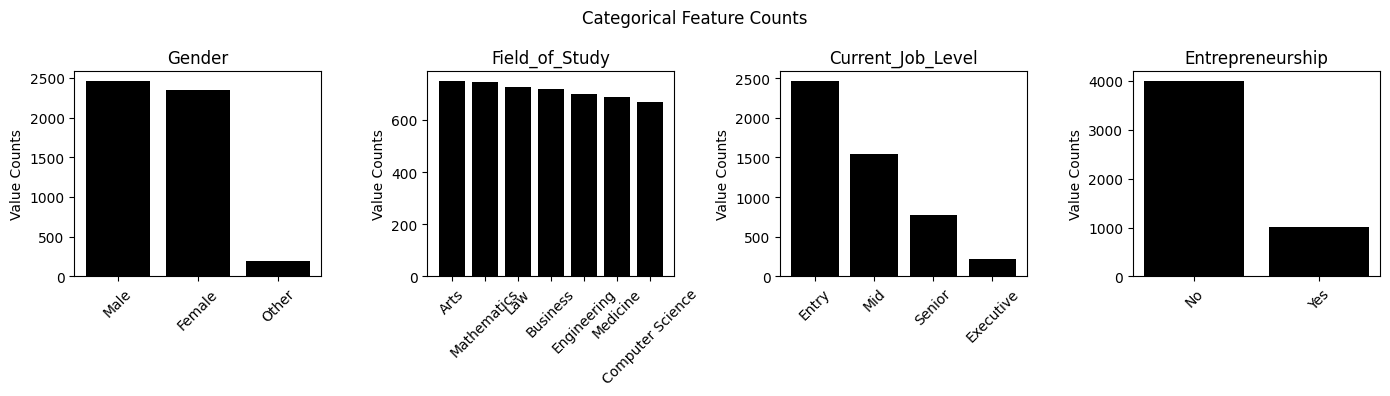

In [39]:
fig, axs=plt.subplots(1,4, figsize=(14,4))
axs=axs.flatten()

fig.suptitle('Categorical Feature Counts')

for i, feature in enumerate(df_categorical.columns):

    # Plot neighborhood group level counts
    level_counts=df_categorical[feature].value_counts()

    axs[i].set_title(feature)
    axs[i].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color='black')
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_ylabel('Value Counts')

fig.tight_layout()
fig.show()

/var/folders/v_/2k7y736n7x103htcsntppd6r0000gn/T/ipykernel_38474/1999844765.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


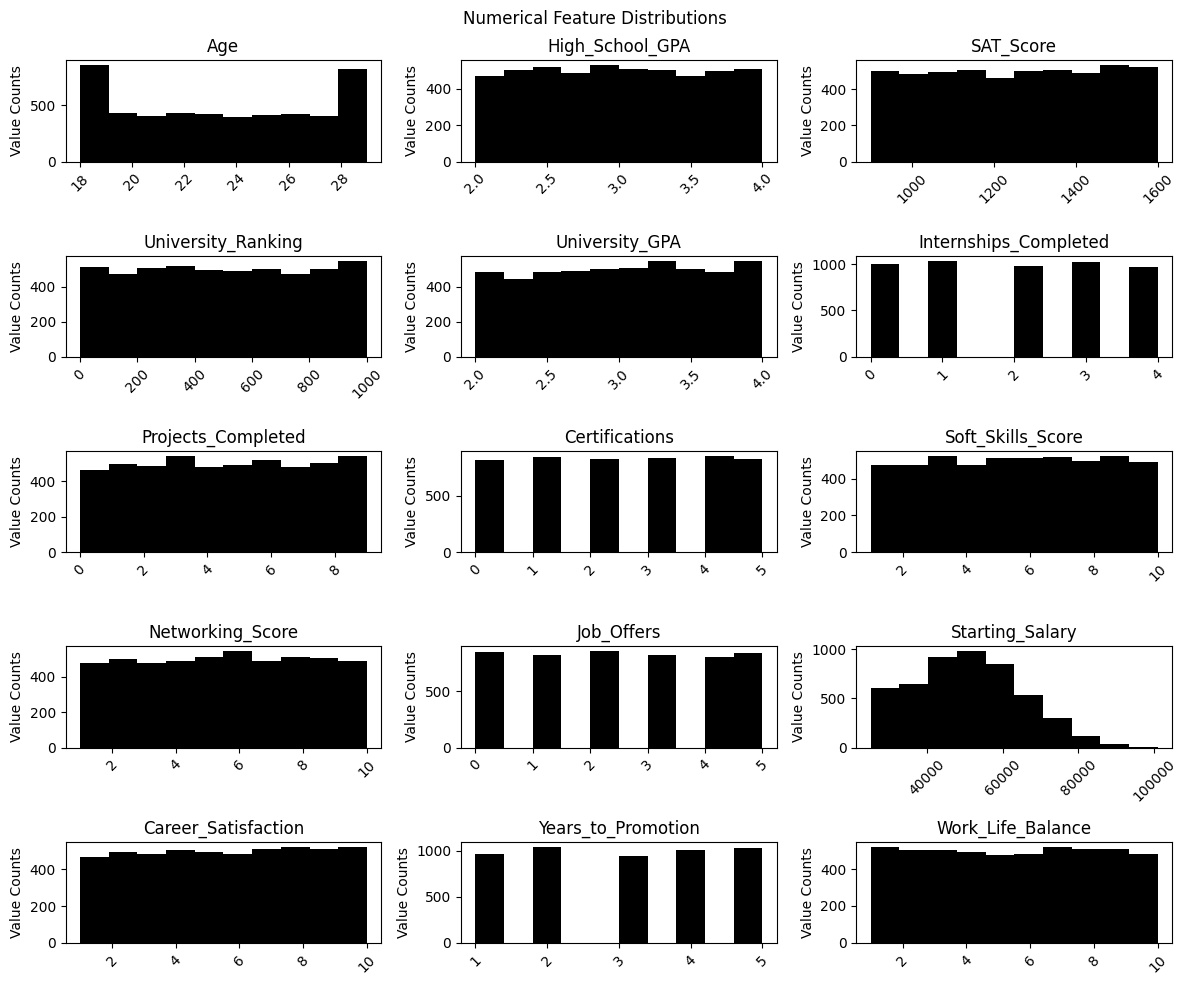

In [41]:
fig, axs=plt.subplots(5,3, figsize=(12,10))
axs=axs.flatten()

fig.suptitle('Numerical Feature Distributions')

for i, feature in enumerate(df_numeric.columns):

    axs[i].set_title(feature)
    axs[i].hist(df_numeric[feature], color='black')
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_ylabel('Value Counts')

fig.tight_layout()
fig.show()

In [42]:
#let's standardize the data
# Create a StandardScaler object
scaler = StandardScaler()   
# Fit the scaler to the data and transform it
df_scaled = scaler.fit_transform(df_numeric.drop(columns=['Starting_Salary']))  # Exclude the target variable
# Convert the scaled data back to a DataFrame
# Get the original column names (excluding the target)
feature_columns = df_numeric.drop(columns=['Starting_Salary']).columns

# Create the scaled DataFrame with column names
df_scaled = pd.DataFrame(df_scaled, columns=feature_columns)

# Add the target variable back to the DataFrame
df_scaled['Starting_Salary'] = df['Starting_Salary']
# Display the first few rows of the scaled DataFrame
df_scaled.head()
# Create a correlation matrix
correlation_matrix = df_scaled.corr()
# Display the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                            Age  High_School_GPA  SAT_Score  \
Age                    1.000000         0.002997  -0.002416   
High_School_GPA        0.002997         1.000000  -0.018129   
SAT_Score             -0.002416        -0.018129   1.000000   
University_Ranking     0.031417         0.014341   0.006149   
University_GPA        -0.015253         0.004969   0.017922   
Internships_Completed  0.007662        -0.002867  -0.005634   
Projects_Completed     0.002919        -0.035227  -0.010944   
Certifications         0.010161        -0.015618   0.017323   
Soft_Skills_Score      0.006055         0.014706   0.001146   
Networking_Score      -0.001647         0.001765  -0.003377   
Job_Offers            -0.030368         0.016809   0.019301   
Career_Satisfaction    0.011029        -0.023750   0.002960   
Years_to_Promotion    -0.004223        -0.009684   0.015944   
Work_Life_Balance     -0.008180        -0.018028   0.017031   
Starting_Salary        0.013171   

In [43]:
print(df_scaled['Starting_Salary'])
print(df_scaled)


0       27200.0
1       25000.0
2       42400.0
3       57400.0
4       47600.0
         ...   
4995    31500.0
4996    41800.0
4997    49500.0
4998    54700.0
4999    57000.0
Name: Starting_Salary, Length: 5000, dtype: float64
           Age  High_School_GPA  SAT_Score  University_Ranking  \
0     0.160594         1.012867  -0.993226           -0.733034   
1    -0.703122        -0.828640  -0.210778           -1.348089   
2     1.312215         0.734903  -0.299357            0.723856   
3     0.448499        -0.984994   1.196642           -1.148798   
4    -0.415217        -1.593038  -1.190068            0.325273   
...        ...              ...        ...                 ...   
4995  0.736404        -0.967621   0.020511            0.933456   
4996 -1.566838         1.638284  -1.091647            1.438557   
4997 -1.278933         0.787022   0.222274            0.741036   
4998 -1.278933        -0.515931  -1.062120           -0.636824   
4999 -0.127312        -1.401939  -0.535568    

In [44]:
print(df_categorical)

      Gender    Field_of_Study Current_Job_Level Entrepreneurship
0       Male              Arts             Entry               No
1      Other               Law               Mid               No
2     Female          Medicine             Entry               No
3       Male  Computer Science               Mid               No
4       Male       Engineering             Entry               No
...      ...               ...               ...              ...
4995  Female              Arts               Mid               No
4996  Female               Law             Entry               No
4997  Female               Law               Mid               No
4998    Male               Law             Entry               No
4999  Female  Computer Science            Senior               No

[5000 rows x 4 columns]


In [45]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Encode the categorical features
for column in df_categorical.columns:
    df_categorical[column] = label_encoder.fit_transform(df_categorical[column])
# Display the encoded categorical features
print("\nEncoded categorical features:")
print(df_categorical.head())


# Initialize the OneHotEncoder


Encoded categorical features:
   Gender  Field_of_Study  Current_Job_Level  Entrepreneurship
0       1               0                  0                 0
1       2               4                  2                 0
2       0               6                  0                 0
3       1               2                  2                 0
4       1               3                  0                 0


In [46]:
#Re-insert the categorical features into the scaled DataFrame
df_scaled = pd.concat([df_scaled, df_categorical], axis=1)
# Display the first few rows of the DataFrame with categorical features
print("\nDataFrame with categorical features:")
print(df_scaled.head())

    


DataFrame with categorical features:
        Age  High_School_GPA  SAT_Score  University_Ranking  University_GPA  \
0  0.160594         1.012867  -0.993226           -0.733034        1.631925   
1 -0.703122        -0.828640  -0.210778           -1.348089        1.058998   
2  1.312215         0.734903  -0.299357            0.723856       -0.677144   
3  0.448499        -0.984994   1.196642           -1.148798       -0.364638   
4 -0.415217        -1.593038  -1.190068            0.325273       -0.937565   

   Internships_Completed  Projects_Completed  Certifications  \
0               0.722829            0.848418       -0.300761   
1               1.433017            0.848418        0.286434   
2               1.433017            1.196530       -0.887956   
3               0.722829            1.544642       -0.887956   
4               1.433017            0.500306        0.873628   

   Soft_Skills_Score  Networking_Score  Job_Offers  Career_Satisfaction  \
0           1.211558       

In [47]:
print(df_scaled)

           Age  High_School_GPA  SAT_Score  University_Ranking  \
0     0.160594         1.012867  -0.993226           -0.733034   
1    -0.703122        -0.828640  -0.210778           -1.348089   
2     1.312215         0.734903  -0.299357            0.723856   
3     0.448499        -0.984994   1.196642           -1.148798   
4    -0.415217        -1.593038  -1.190068            0.325273   
...        ...              ...        ...                 ...   
4995  0.736404        -0.967621   0.020511            0.933456   
4996 -1.566838         1.638284  -1.091647            1.438557   
4997 -1.278933         0.787022   0.222274            0.741036   
4998 -1.278933        -0.515931  -1.062120           -0.636824   
4999 -0.127312        -1.401939  -0.535568           -1.451171   

      University_GPA  Internships_Completed  Projects_Completed  \
0           1.631925               0.722829            0.848418   
1           1.058998               1.433017            0.848418   
2     

In [48]:
print(df_scaled.columns)
print(df_scaled.info())

Index(['Age', 'High_School_GPA', 'SAT_Score', 'University_Ranking',
       'University_GPA', 'Internships_Completed', 'Projects_Completed',
       'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Career_Satisfaction', 'Years_to_Promotion', 'Work_Life_Balance',
       'Starting_Salary', 'Gender', 'Field_of_Study', 'Current_Job_Level',
       'Entrepreneurship'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   float64
 1   High_School_GPA        5000 non-null   float64
 2   SAT_Score              5000 non-null   float64
 3   University_Ranking     5000 non-null   float64
 4   University_GPA         5000 non-null   float64
 5   Internships_Completed  5000 non-null   float64
 6   Projects_Completed     5000 non-null   float64
 7   Ce

In [52]:
# Define the features (X) and target (y)
X = df_scaled.drop(columns=['Starting_Salary'])
y = df_scaled['Starting_Salary']

# Use SelectKBest with f_regression to select the top 4 features
selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices and names
selected_features = X.columns[selector.get_support()]
print("Top 4 important features for determining Starting_Salary:")
print(selected_features)

Top 4 important features for determining Starting_Salary:
Index(['University_Ranking', 'Internships_Completed', 'Certifications',
       'Job_Offers'],
      dtype='object')


In [55]:
df_kbest = pd.DataFrame(X_new, columns=selected_features)
# Add the target variable back to the DataFrame
df_kbest['Starting_Salary'] = y.values
# Display the first few rows of the DataFrame with selected features
print("\nDataFrame with selected features:")
print(df_kbest.head())


DataFrame with selected features:
   University_Ranking  Internships_Completed  Certifications  Job_Offers  \
0           -0.733034               0.722829       -0.300761    1.467090   
1           -1.348089               1.433017        0.286434    0.882871   
2            0.723856               1.433017       -0.887956   -1.454004   
3           -1.148798               0.722829       -0.887956   -0.869785   
4            0.325273               1.433017        0.873628    0.882871   

   Starting_Salary  
0          27200.0  
1          25000.0  
2          42400.0  
3          57400.0  
4          47600.0  


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 212656395.1001482
R-squared Score: 0.0009145449528510374


In [57]:
#Hyperparameter tuning for Lasso and Ridge regression
# Define the model
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
# Fit the model to the training data
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
# Make predictions on the test data
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
# Calculate the mean squared error and R-squared score
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
# Print the results
print("Lasso Mean Squared Error:", lasso_mse)
print("Lasso R-squared Score:", lasso_r2)
print("Ridge Mean Squared Error:", ridge_mse)
print("Ridge R-squared Score:", ridge_r2)

Lasso Mean Squared Error: 212656322.15862542
Lasso R-squared Score: 0.0009148876409438289
Ridge Mean Squared Error: 212656387.4359576
Ridge R-squared Score: 0.0009145809601449617


In [63]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df_kbest[['University_Ranking', 'Internships_Completed', 'Certifications', 'Job_Offers']]
y = df_kbest['Starting_Salary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {'alpha': [0.01, 0.1, 1, 10, 100]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10]
        }
    }
}

# Search across models
results = []

for name, mp in models.items():
    pipe = Pipeline([
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipe, {'model__' + k: v for k, v in mp['params'].items()},
                        cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Test RMSE': round(rmse, 2),
        'Test R²': round(r2, 4)
    })

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False)
print(results_df)

               Model                                        Best Params  \
0  Linear Regression                                                 {}   
1   Ridge Regression                              {'model__alpha': 100}   
2      Random Forest  {'model__max_depth': 5, 'model__n_estimators':...   

   Test RMSE  Test R²  
0   14582.74   0.0009  
1   14582.50   0.0009  
2   14643.55  -0.0074  


In [65]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

X = df_kbest[['University_Ranking', 'Internships_Completed', 'Certifications', 'Job_Offers']]
y = df_kbest['Starting_Salary']

# Models and param grids
models = {
    'Ridge': (Ridge(), {'model__alpha': [0.01, 0.1, 1, 10, 100]}),
    'Lasso': (Lasso(max_iter=10000), {'model__alpha': [0.01, 0.1, 1, 10, 100]}),
    'ElasticNet': (ElasticNet(max_iter=10000), {
        'model__alpha': [0.01, 0.1, 1, 10],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    })
}

# Results storage
results = []

# Grid search for each model
for name, (model, param_grid) in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # Ensure features are standardized
        ('model', model)
    ])
    
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
    grid.fit(X, y)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4)
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)

        Model                                  Best Params      RMSE      R²
0       Ridge                        {'model__alpha': 100}  14476.11  0.0024
1       Lasso                          {'model__alpha': 1}  14476.11  0.0024
2  ElasticNet  {'model__alpha': 1, 'model__l1_ratio': 0.1}  14480.24  0.0018


/var/folders/v_/2k7y736n7x103htcsntppd6r0000gn/T/ipykernel_38474/3404305498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')


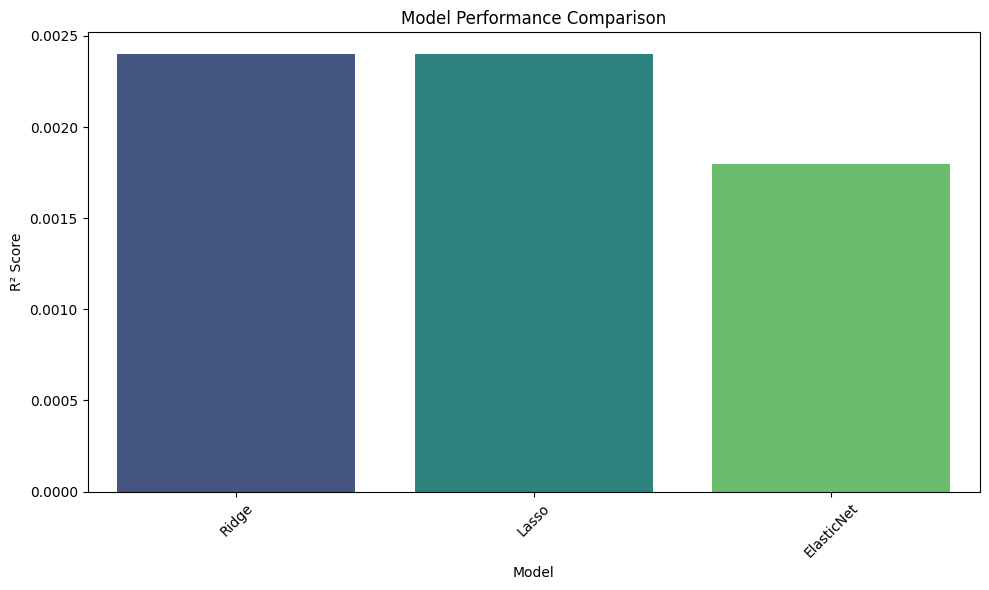

In [66]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
X = df_kbest[['University_Ranking', 'Internships_Completed', 'Certifications', 'Job_Offers']]
y = df_kbest['Starting_Salary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression pipeline with scaling
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Alpha values to try
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Results
print(f"✅ Best Ridge alpha: {grid.best_params_['ridge__alpha']}")
print(f"Test RMSE: ${rmse:,.2f}")
print(f"Test R²: {r2:.4f}")

✅ Best Ridge alpha: 1000
Test RMSE: $14,581.53
Test R²: 0.0011


In [69]:
#save the model
import joblib
# Save the best model (assuming it's the last one in the results)
best_model = results_df.iloc[-1]['Best Params'] 
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [73]:
import pickle

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)